## Bank Customer Churn Prediction Using Artificial Neural Networks (ANN)

I developed a classification model using an Artificial Neural Network (ANN) to predict whether a customer is likely to leave the bank (churn) or not. The dataset, sourced from Kaggle, contains 14 columns related to customer information and banking behavior.

### Data Preprocessing

To prepare the data for modeling:

- **Removed 3 irrelevant columns** that did not contribute to the prediction task.
- **Dropped duplicate records** to ensure data quality.
- **Encoded categorical variables**:
  - Applied **Label Encoding** to the `Gender` column.
  - Used **One-Hot Encoding** for the `Geography` column.
- **Normalized features** using **Min-Max Scaling** so that all values lie within the same range and contribute equally during model training.
- Addressed **class imbalance** in the target variable (`Exited`) by applying the **SMOTE (Synthetic Minority Oversampling Technique)** method to balance the dataset.

### Model Architecture

The ANN was built using the following architecture:

- **Input Layer**: Corresponding to the number of processed input features.
- **Two Hidden Layers**: Each using the **ReLU (Rectified Linear Unit)** activation function to capture non-linear relationships.
- **Output Layer**: A single neuron with a **Sigmoid** activation function for binary classification (churn or not).
- **Optimizer**: **Adam** optimizer was used for efficient gradient descent and learning.

### Training and Validation

- The dataset was split into **80% training** and **20% validation**.
- The model was trained on the training set and evaluated on the validation set to monitor generalization performance.

---

Let me know if you'd like this turned into a GitHub README version or want to include evaluation metrics like accuracy, precision, or confusion matrix!


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5222,5223,15724719,Jones,550,France,Female,22,7,139096.85,1,1,0,129890.94,0
3962,3963,15600911,Mbadiwe,712,France,Male,33,2,182888.08,1,1,0,3061.00,0
5461,5462,15589563,Purdy,531,Spain,Male,31,2,118899.45,2,0,0,41409.36,0
866,867,15808017,Cary,545,France,Male,38,1,88293.13,2,1,1,24302.95,0
4935,4936,15804862,Toscani,505,Germany,Male,43,6,127146.68,1,0,0,137565.87,0


In [ ]:
df.drop(columns = ["RowNumber", "CustomerId", "Surname"], axis = 1, inplace = True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [ ]:
df.shape

(10000, 11)

In [ ]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [ ]:
def print_unique_objcol_values(dataframe):
  for column in dataframe.columns:
    if dataframe[column].dtypes == "object":
      print(f"{column}: {dataframe[column].unique()}")

In [ ]:
print_unique_objcol_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [ ]:
df['Gender'].replace({'Female' : 1, 'Male' : 0}, inplace = True)

In [ ]:
df['Gender'].unique()

array([1, 0])

In [ ]:
df1 = pd.get_dummies(data = df, columns = ['Geography'])

In [ ]:
df1.dtypes

,0
CreditScore,int64
Gender,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Exited,int64


In [ ]:
df1[['Geography_France', 'Geography_Germany', 'Geography_Spain']] = \
    df1[['Geography_France', 'Geography_Germany', 'Geography_Spain']].astype(int)

In [ ]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


In [ ]:
df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]


    return outlier_count



In [ ]:
columns_to_check = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

for i in columns_to_check:
  outliers_in_column = find_outliers_iqr(df1, i)
  print(f'{i}Total rows : {df1[i].shape[0]} Outliers rows : {outliers_in_column}')

CreditScoreTotal rows : 10000 Outliers rows : 15
AgeTotal rows : 10000 Outliers rows : 359
BalanceTotal rows : 10000 Outliers rows : 0
EstimatedSalaryTotal rows : 10000 Outliers rows : 0


In [ ]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

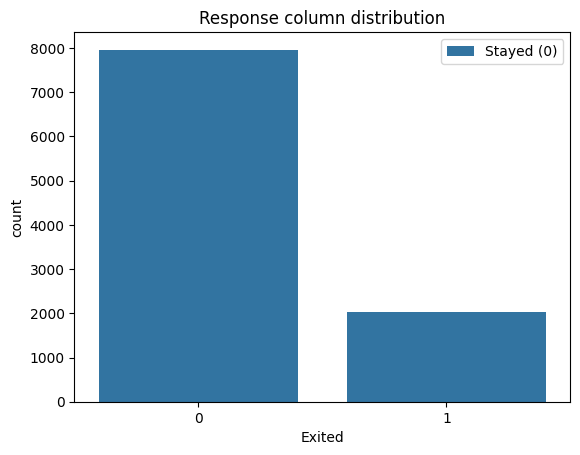

In [ ]:
#How many Customers are exited vs staying

sns.countplot(x= 'Exited', data = df1)
plt.title('Response column distribution')
plt.legend(labels=['Stayed (0)', 'Exited (1)'])
plt.show()

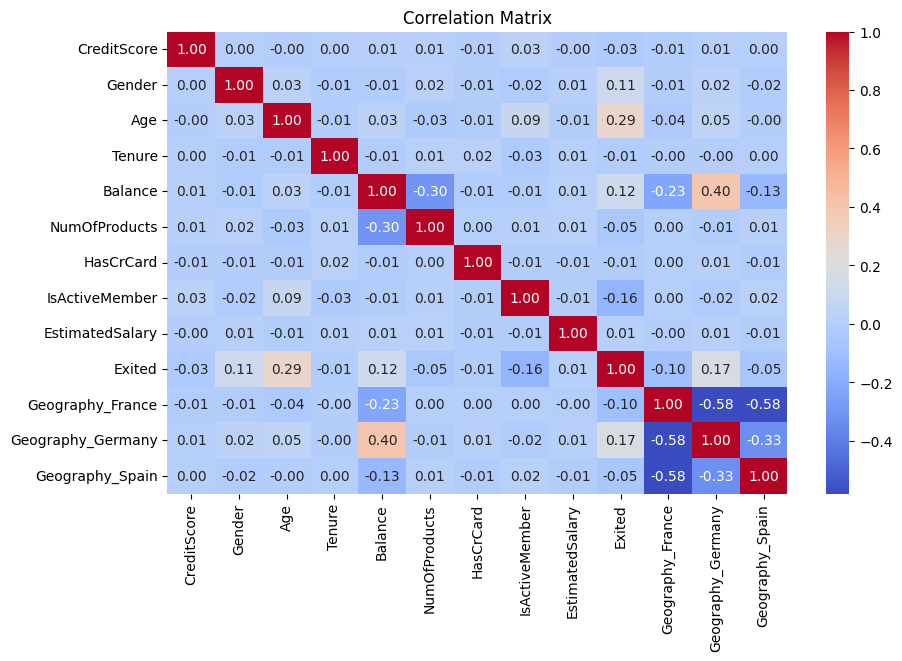

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
X = df1.drop('Exited', axis=1)
y = df1['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE :", Counter(y_train_res))

Before SMOTE: Counter({0: 6370, 1: 1630})
After SMOTE : Counter({1: 6370, 0: 6370})


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_x = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [ ]:
scaled_x[0]

array([0.806     , 0.        , 0.52702703, 0.7       , 0.        ,
       0.        , 1.        , 0.        , 0.79739365, 1.        ,
       0.        , 0.        ])

In [ ]:
len(scaled_x)

12740

In [ ]:
len(y_train_res)

12740

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(scaled_x, y_train_res, epochs=20, validation_split=0.2, verbose = 1)

Epoch 1/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5883 - loss: 0.6797 - val_accuracy: 0.5671 - val_loss: 0.7428
Epoch 2/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7582 - loss: 0.5304 - val_accuracy: 0.7889 - val_loss: 0.4427
Epoch 3/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8049 - loss: 0.4474 - val_accuracy: 0.7465 - val_loss: 0.4751
Epoch 4/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8146 - loss: 0.4319 - val_accuracy: 0.8587 - val_loss: 0.3061
Epoch 5/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8027 - loss: 0.4271 - val_accuracy: 0.8018 - val_loss: 0.3803
Epoch 6/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8152 - loss: 0.4088 - val_accuracy: 0.8591 - val_loss: 0.2995
Epoch 7/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8124 - loss: 0.4107 - val_accuracy: 0.8210 - val_loss: 0.3523
Epoch 8/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8276 - loss: 0.3890 - val_accuracy: 0.

In [ ]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8501 - loss: 0.3604


[0.3746192753314972, 0.8360000252723694]

In [ ]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
predictions = []

for i in y_pred:
  if i > 0.5:
    predictions.append(1)
  else:
    predictions.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1607
           1       0.72      0.35      0.47       393

    accuracy                           0.84      2000
   macro avg       0.79      0.66      0.69      2000
weighted avg       0.83      0.84      0.82      2000

